In [2]:
!ln -s "/content/drive/MyDrive/MPCE" /content/dados

In [3]:
!pip install moviepy

In [1]:
lista_abertura_boca = [] 

In [ ]:
# clip = VideoFileClip(v2)
# start_time = float(63) ## tempo em segundos
# end_time = float(70) ## tempo em segundos
# trim_video = clip.subclip(start_time,end_time)
# trim_video.write_videofile(f"/content/dados/v2_falando.mp4",codec='libx264')

[MoviePy] >>>> Building video /content/dados/v2_falando.mp4
[MoviePy] Writing audio in v2_falandoTEMP_MPY_wvf_snd.mp3


100%|██████████| 155/155 [00:00<00:00, 802.50it/s]

[MoviePy] Done.


[MoviePy] Writing video /content/dados/v2_falando.mp4


100%|█████████▉| 7000/7001 [00:19<00:00, 359.04it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/v2_falando.mp4 



In [ ]:
import cv2
import numpy as np
import dlib


from scipy.spatial import distance as dist

from PIL import Image as Img

# FACE = list(range(17, 68))
# FACE_COMPLETA = list(range(0, 68))
LABIO = list(range(48, 61))
# SOMBRANCELHA_DIRETA = list(range(17, 22))
# SOMBRANCELHA_ESQUERDA = list(range(22, 27))
OLHO_DIREITO = list(range(36,42))
OLHO_ESQUERDO = list(range(42,48))
# NARIZ = list(range(27,35))
# MANDIBULA = list(range(0,17))

classificador_dlib_68 = '/content/dados/shape_predictor_68_face_landmarks.dat'
classificador_dlib = dlib.shape_predictor(classificador_dlib_68)
detector_face = dlib.get_frontal_face_detector()

def pontos_marcos_faciais(img):
    retangulos = detector_face(img,1)
    if len(retangulos) == 0:
        return None
    marcos = []
    for ret in retangulos:
        marcos.append(np.matrix([[p.x,p.y] for p in classificador_dlib(img,ret).parts()]))
    return marcos

def aspecto_razao_boca(pontos_boca):
    
    a = dist.euclidean(pontos_boca[3], pontos_boca[9])
    b = dist.euclidean(pontos_boca[2], pontos_boca[10])
    c = dist.euclidean(pontos_boca[4], pontos_boca[8])
    d = dist.euclidean(pontos_boca[0], pontos_boca[6])
    aspecto_razao = (a + b + c)/(3.0 * d)
    
    return aspecto_razao
def anotar_marcos_casca_convexa(imagem, marcos):
    retangulos = detector_face(imagem, 1)


    if len(retangulos) == 0:
        return None
   

    boca = round(aspecto_razao_boca(marcos[0][LABIO]),3)
    falando = False
    lista_abertura_boca.append(boca)
    if (boca>0.4):
        falando = True
    
    
    return imagem, falando

def padronizar_imagem(frame):
    
    marcos_faciais = pontos_marcos_faciais(frame)
    fala = False
    if marcos_faciais is not None:
        frame,fala= anotar_marcos_casca_convexa(frame,marcos_faciais)
    return frame,fala

## locais dos videos
v1 = "/content/dados/v1.asf"
# v2 = "/content/dados/v2.asf"
v3 = "/content/dados/v3.asf"
v3_calado = "/content/dados/v3_calado.mp4"
v3_falando = "/content/dados/v3_falando.mp4"
v2_calado = "/content/dados/v2_calado.mp4"
v2_falando = "/content/dados/v2_falando.mp4"
v=  v3
import os

path_out = os.path.dirname(v)+"/trim_"+os.path.basename(v).split(".")[0]
if not os.path.isdir(path_out):
    os.mkdir(path_out)

## moviepy
from moviepy.editor import *

clip = VideoFileClip(v)
# start_time = float(2.9) ## tempo em segundos
# end_time = float(10.2) ## tempo em segundos
# trim_video = clip.subclip(start_time,end_time)
# trim_video.write_videofile(f"{path_out}/trim.mp4",codec='libx264')
# fps = clip.fps
# fps = 24.0
## Open cv 


captura = cv2.VideoCapture(v)
captura_ok, frame = captura.read()

print(f"clip.duration: {clip.duration}")
# fourcc = cv2.VideoWriter_fourcc(*'DIVX')
# out = cv2.VideoWriter('/content/dados/output1.avi',fourcc, fps, (frame.shape[1], frame.shape[0]))


n = 0
fn = 1
f_start = -1
times = []
duration  = clip.duration
grava= False
try:
    while(True):
        captura_ok, frame = captura.read()
        if  captura_ok:
            fn+=1

            # print(falando)
            frame, falando = padronizar_imagem(frame)
            if not grava and falando:
                grava = True

                f_start = fn
                print(f"start_time: {f_start}")
            if falando:
                n=0

            if grava :
                # print("salvando frame")
                n+=1
                if n>=10:
                    grava= False
                    n=0
                    times.append([f_start,fn])
                    print(f"frame_start: {f_start}, frame_end: {fn} ")
                    f_start = -1
          
        else:
            if f_start>-1:
                grava= False
                n=0
                times.append([f_start,fn])
                print(f"frame_start: {f_start}, frame_end: {fn} ")
                f_start = -1
            break
            
except KeyboardInterrupt:
    captura.release()
    # out.release()
    print("Interrompido")
captura.release()
# out.release()

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)3006464/45929032 bytes (6.5%)6668288/45929032 bytes (14.5%)10092544/45929032 bytes (22.0%)13484032/45929032 bytes (29.4%)16654336/45929032 bytes (36.3%)19619840/45929032 bytes (42.7%)21733376/45929032 bytes (47.3%)24895488/45929032 bytes (54.2%)28573696/45929032 bytes (62.2%)31899648/45929032 bytes (69.5%)35512320/45929032 bytes (77.3%)39247872/45929032 bytes (85.5%)

# Visualisação grafica


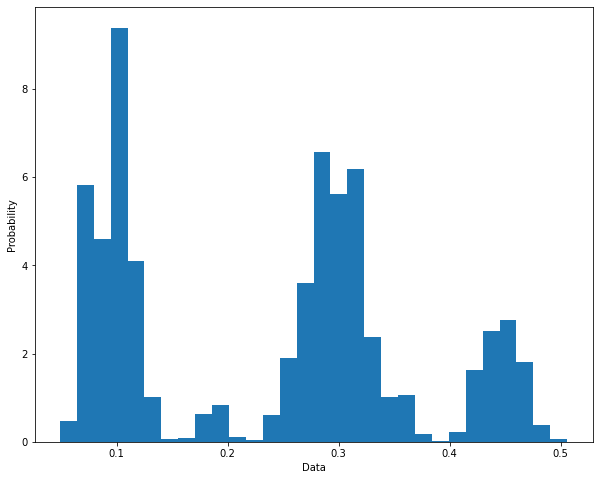

In [ ]:
# v2_calado
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=[10,8])
plt.hist(lista_abertura_boca, density=True, bins=30)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data');
plt.show()

In [ ]:
df = pd.DataFrame(lista_abertura_boca,columns=['boca'])
df

,boca
0,0.475
1,0.447
2,0.447
3,0.447
4,0.449
...,...
6994,0.268
6995,0.268
6996,0.268
6997,0.271


In [ ]:
d = df['boca'].value_counts(ascending=True)

In [ ]:
df = d.reset_index()

In [ ]:
df.columns = ['boca','n']

In [ ]:
df.sort_values("boca").head(60)

,boca,n
27,0.049,1
141,0.052,23
138,0.059,22
112,0.063,5
205,0.066,92
197,0.069,82
222,0.073,279
201,0.074,86
139,0.076,22
171,0.077,59


In [ ]:
menor=0
maior=0
for i in range(df.shape[0]):
    if df.boca[i]<0.4:
        menor+=df.n[i]
    else:
        maior+=df.n[i]
print(f"total: {df.shape[0]}")
print(f"menor: {menor}")
print(f"maior: {maior}")

total: 224
menor: 6000
maior: 999


In [ ]:
menor/(maior+menor)

0.8572653236176596

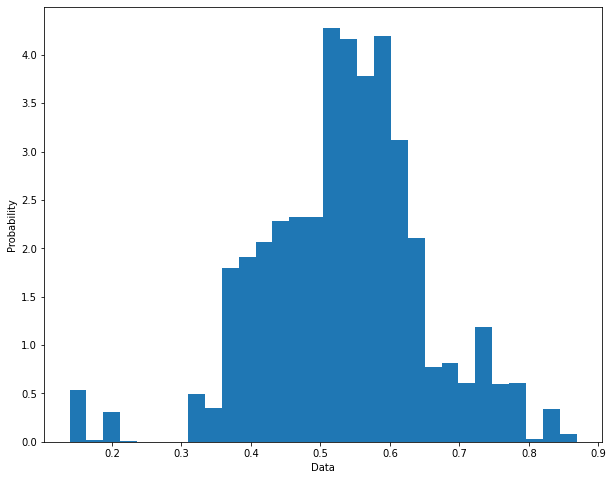

In [ ]:
# v2_falado
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=[10,8])
plt.hist(lista_abertura_boca, density=True, bins=30)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data');
plt.show()

In [ ]:
len(lista_abertura_boca)

6999

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(lista_abertura_boca,columns=['boca'])
df

,boca
0,0.467
1,0.434
2,0.434
3,0.445
4,0.445
...,...
6994,0.518
6995,0.518
6996,0.518
6997,0.518


In [ ]:
d = df['boca'].value_counts(ascending=True)

In [ ]:
d.index

Float64Index([0.387, 0.169, 0.766, 0.671, 0.409, 0.702, 0.742, 0.672,  0.73,
              0.757,
              ...
              0.561, 0.743, 0.512, 0.536, 0.541, 0.589,  0.59, 0.623, 0.509,
              0.572],
             dtype='float64', length=348)

In [ ]:
df = d.reset_index()

In [ ]:
df.columns = ['boca','n']

In [ ]:
df.sort_values("boca").head(60)

,boca,n
156,0.139,3
229,0.141,13
67,0.144,1
139,0.145,2
107,0.149,2
122,0.150,2
124,0.151,2
246,0.156,34
92,0.158,1
243,0.160,32


In [ ]:
menor=0
maior=0
for i in range(df.shape[0]):
    if df.boca[i]<0.4:
        menor+=df.n[i]
    else:
        maior+=df.n[i]
print(f"total: {df.shape[0]}")
print(f"menor: {menor}")
print(f"maior: {maior}")

total: 348
menor: 880
maior: 6119


In [ ]:
880/(880+6119)

0.12573224746392342

# Cortar Clips

In [ ]:
paths = [] 
fps= fn/duration
d=0
for i in times:
    start_time = float(i[0]/fps) ## tempo em segundos
    end_time = float(i[1]/fps) ## tempo em segundos
    trim_video = clip.subclip(start_time,end_time)
    file_name= f"{path_out}/trim_{d}.mp4"#start{int(start_time)}s:end{int(end_time)}s.mp4"
    trim_video.write_videofile(file_name,codec='libx264')
    paths.append(file_name)
    d+=1

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_0.mp4
[MoviePy] Writing audio in trim_0TEMP_MPY_wvf_snd.mp3


100%|██████████| 8/8 [00:00<00:00, 1183.16it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_0.mp4



100%|██████████| 10/10 [00:01<00:00,  5.01it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_0.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_1.mp4
[MoviePy] Writing audio in trim_1TEMP_MPY_wvf_snd.mp3



100%|██████████| 8/8 [00:00<00:00, 1936.54it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_1.mp4



100%|██████████| 9/9 [00:00<00:00, 25.56it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_1.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_2.mp4
[MoviePy] Writing audio in trim_2TEMP_MPY_wvf_snd.mp3



100%|██████████| 43/43 [00:00<00:00, 955.77it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_2.mp4



100%|██████████| 49/49 [00:00<00:00, 107.62it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_2.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_3.mp4
[MoviePy] Writing audio in trim_3TEMP_MPY_wvf_snd.mp3


100%|██████████| 8/8 [00:00<00:00, 1076.01it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_3.mp4



100%|██████████| 9/9 [00:00<00:00, 26.22it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_3.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_4.mp4
[MoviePy] Writing audio in trim_4TEMP_MPY_wvf_snd.mp3



100%|██████████| 26/26 [00:00<00:00, 1372.10it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_4.mp4



100%|██████████| 30/30 [00:00<00:00, 73.24it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_4.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_5.mp4
[MoviePy] Writing audio in trim_5TEMP_MPY_wvf_snd.mp3



100%|██████████| 33/33 [00:00<00:00, 968.93it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_5.mp4



100%|██████████| 38/38 [00:00<00:00, 81.80it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_5.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_6.mp4
[MoviePy] Writing audio in trim_6TEMP_MPY_wvf_snd.mp3



100%|██████████| 31/31 [00:00<00:00, 848.25it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_6.mp4



100%|██████████| 36/36 [00:00<00:00, 94.66it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_6.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_7.mp4
[MoviePy] Writing audio in trim_7TEMP_MPY_wvf_snd.mp3



100%|██████████| 16/16 [00:00<00:00, 1123.46it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_7.mp4


100%|██████████| 18/18 [00:00<00:00, 53.05it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_7.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_8.mp4
[MoviePy] Writing audio in trim_8TEMP_MPY_wvf_snd.mp3



100%|██████████| 13/13 [00:00<00:00, 1272.42it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_8.mp4



100%|██████████| 15/15 [00:00<00:00, 31.31it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_8.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_9.mp4
[MoviePy] Writing audio in trim_9TEMP_MPY_wvf_snd.mp3



100%|██████████| 15/15 [00:00<00:00, 794.99it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_9.mp4



100%|██████████| 17/17 [00:00<00:00, 43.79it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_9.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_10.mp4
[MoviePy] Writing audio in trim_10TEMP_MPY_wvf_snd.mp3



100%|██████████| 83/83 [00:00<00:00, 1017.14it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_10.mp4



100%|██████████| 93/93 [00:00<00:00, 133.05it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_10.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_11.mp4
[MoviePy] Writing audio in trim_11TEMP_MPY_wvf_snd.mp3


100%|██████████| 104/104 [00:00<00:00, 936.68it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_11.mp4



100%|██████████| 117/117 [00:00<00:00, 129.70it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_11.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_12.mp4
[MoviePy] Writing audio in trim_12TEMP_MPY_wvf_snd.mp3


100%|██████████| 8/8 [00:00<00:00, 1993.49it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_12.mp4



100%|██████████| 9/9 [00:00<00:00, 13.72it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_12.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_13.mp4
[MoviePy] Writing audio in trim_13TEMP_MPY_wvf_snd.mp3



100%|██████████| 27/27 [00:00<00:00, 1373.81it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_13.mp4



100%|██████████| 30/30 [00:00<00:00, 105.54it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_13.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_14.mp4
[MoviePy] Writing audio in trim_14TEMP_MPY_wvf_snd.mp3



100%|██████████| 188/188 [00:00<00:00, 971.28it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_14.mp4



100%|██████████| 214/214 [00:01<00:00, 198.61it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_14.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_15.mp4
[MoviePy] Writing audio in trim_15TEMP_MPY_wvf_snd.mp3


100%|██████████| 15/15 [00:00<00:00, 830.39it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_15.mp4



100%|██████████| 17/17 [00:00<00:00, 47.70it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_15.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_16.mp4
[MoviePy] Writing audio in trim_16TEMP_MPY_wvf_snd.mp3



100%|██████████| 8/8 [00:00<00:00, 820.98it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_16.mp4



100%|██████████| 9/9 [00:00<00:00, 27.77it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_16.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_17.mp4
[MoviePy] Writing audio in trim_17TEMP_MPY_wvf_snd.mp3



100%|██████████| 71/71 [00:00<00:00, 916.22it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_17.mp4



100%|██████████| 81/81 [00:00<00:00, 142.87it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_17.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_18.mp4
[MoviePy] Writing audio in trim_18TEMP_MPY_wvf_snd.mp3


100%|██████████| 10/10 [00:00<00:00, 830.42it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_18.mp4



100%|██████████| 12/12 [00:00<00:00, 34.04it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_18.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_19.mp4
[MoviePy] Writing audio in trim_19TEMP_MPY_wvf_snd.mp3



100%|██████████| 8/8 [00:00<00:00, 1420.59it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_19.mp4



100%|██████████| 9/9 [00:00<00:00, 24.82it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_19.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_20.mp4
[MoviePy] Writing audio in trim_20TEMP_MPY_wvf_snd.mp3



100%|██████████| 49/49 [00:00<00:00, 961.53it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_20.mp4



100%|██████████| 56/56 [00:00<00:00, 85.98it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_20.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_21.mp4
[MoviePy] Writing audio in trim_21TEMP_MPY_wvf_snd.mp3


100%|██████████| 8/8 [00:00<00:00, 432.05it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_21.mp4



100%|██████████| 9/9 [00:00<00:00, 34.81it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_21.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_22.mp4
[MoviePy] Writing audio in trim_22TEMP_MPY_wvf_snd.mp3



100%|██████████| 21/21 [00:00<00:00, 2374.71it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_22.mp4



100%|██████████| 24/24 [00:00<00:00, 83.86it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_22.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_23.mp4
[MoviePy] Writing audio in trim_23TEMP_MPY_wvf_snd.mp3



100%|██████████| 29/29 [00:00<00:00, 2130.65it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_23.mp4



100%|██████████| 33/33 [00:00<00:00, 130.37it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_23.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_24.mp4
[MoviePy] Writing audio in trim_24TEMP_MPY_wvf_snd.mp3



100%|██████████| 50/50 [00:00<00:00, 929.05it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_24.mp4



100%|██████████| 56/56 [00:00<00:00, 165.56it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_24.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_25.mp4
[MoviePy] Writing audio in trim_25TEMP_MPY_wvf_snd.mp3


100%|██████████| 158/158 [00:00<00:00, 999.46it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_25.mp4



100%|██████████| 179/179 [00:01<00:00, 178.22it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_25.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_26.mp4
[MoviePy] Writing audio in trim_26TEMP_MPY_wvf_snd.mp3


100%|██████████| 9/9 [00:00<00:00, 1205.64it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_26.mp4



100%|██████████| 11/11 [00:00<00:00, 40.16it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_26.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_27.mp4
[MoviePy] Writing audio in trim_27TEMP_MPY_wvf_snd.mp3



100%|██████████| 145/145 [00:00<00:00, 1016.33it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_27.mp4



100%|██████████| 164/164 [00:00<00:00, 184.65it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_27.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_28.mp4
[MoviePy] Writing audio in trim_28TEMP_MPY_wvf_snd.mp3


100%|██████████| 29/29 [00:00<00:00, 1464.23it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_28.mp4



100%|██████████| 33/33 [00:00<00:00, 76.40it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_28.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_29.mp4
[MoviePy] Writing audio in trim_29TEMP_MPY_wvf_snd.mp3



100%|██████████| 8/8 [00:00<00:00, 1192.33it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_29.mp4


100%|██████████| 9/9 [00:00<00:00, 17.73it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_29.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_30.mp4
[MoviePy] Writing audio in trim_30TEMP_MPY_wvf_snd.mp3



100%|██████████| 19/19 [00:00<00:00, 1356.32it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_30.mp4



100%|██████████| 22/22 [00:00<00:00, 54.95it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_30.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_31.mp4
[MoviePy] Writing audio in trim_31TEMP_MPY_wvf_snd.mp3



100%|██████████| 113/113 [00:00<00:00, 968.22it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_31.mp4



100%|██████████| 127/127 [00:00<00:00, 173.34it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_31.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_32.mp4
[MoviePy] Writing audio in trim_32TEMP_MPY_wvf_snd.mp3


100%|██████████| 8/8 [00:00<00:00, 686.18it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_32.mp4



100%|██████████| 9/9 [00:00<00:00, 19.04it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_32.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_33.mp4
[MoviePy] Writing audio in trim_33TEMP_MPY_wvf_snd.mp3



100%|██████████| 20/20 [00:00<00:00, 1669.54it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_33.mp4



100%|██████████| 22/22 [00:00<00:00, 53.98it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_33.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_34.mp4
[MoviePy] Writing audio in trim_34TEMP_MPY_wvf_snd.mp3



100%|██████████| 353/353 [00:00<00:00, 1103.56it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_34.mp4



100%|█████████▉| 400/401 [00:01<00:00, 235.81it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_34.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_35.mp4
[MoviePy] Writing audio in trim_35TEMP_MPY_wvf_snd.mp3


100%|██████████| 20/20 [00:00<00:00, 973.55it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_35.mp4



100%|██████████| 22/22 [00:00<00:00, 80.78it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_35.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_36.mp4
[MoviePy] Writing audio in trim_36TEMP_MPY_wvf_snd.mp3



100%|██████████| 10/10 [00:00<00:00, 833.96it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_36.mp4



100%|██████████| 11/11 [00:00<00:00, 24.00it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_36.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_37.mp4
[MoviePy] Writing audio in trim_37TEMP_MPY_wvf_snd.mp3



100%|██████████| 33/33 [00:00<00:00, 893.77it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_37.mp4



100%|██████████| 38/38 [00:00<00:00, 106.91it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_37.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_38.mp4
[MoviePy] Writing audio in trim_38TEMP_MPY_wvf_snd.mp3



100%|██████████| 8/8 [00:00<00:00, 833.32it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_38.mp4



100%|██████████| 9/9 [00:00<00:00, 25.60it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_38.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_39.mp4
[MoviePy] Writing audio in trim_39TEMP_MPY_wvf_snd.mp3



100%|██████████| 8/8 [00:00<00:00, 1940.24it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_39.mp4



100%|██████████| 9/9 [00:00<00:00, 34.19it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_39.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_40.mp4
[MoviePy] Writing audio in trim_40TEMP_MPY_wvf_snd.mp3



100%|██████████| 10/10 [00:00<00:00, 739.64it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_40.mp4



100%|██████████| 11/11 [00:00<00:00, 33.46it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_40.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_41.mp4
[MoviePy] Writing audio in trim_41TEMP_MPY_wvf_snd.mp3



100%|██████████| 91/91 [00:00<00:00, 958.91it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_41.mp4



100%|██████████| 103/103 [00:00<00:00, 154.81it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_41.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_42.mp4
[MoviePy] Writing audio in trim_42TEMP_MPY_wvf_snd.mp3


100%|██████████| 24/24 [00:00<00:00, 2100.74it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_42.mp4



100%|██████████| 28/28 [00:00<00:00, 68.64it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_42.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_43.mp4
[MoviePy] Writing audio in trim_43TEMP_MPY_wvf_snd.mp3



100%|██████████| 9/9 [00:00<00:00, 635.28it/s]

[MoviePy] Done.


[MoviePy] Writing video /content/dados/trim_v3/trim_43.mp4


100%|██████████| 11/11 [00:00<00:00, 44.30it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_43.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_44.mp4
[MoviePy] Writing audio in trim_44TEMP_MPY_wvf_snd.mp3



100%|██████████| 14/14 [00:00<00:00, 1145.09it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_44.mp4



100%|██████████| 15/15 [00:00<00:00, 40.18it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_44.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_45.mp4
[MoviePy] Writing audio in trim_45TEMP_MPY_wvf_snd.mp3



100%|██████████| 31/31 [00:00<00:00, 753.70it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_45.mp4



100%|██████████| 36/36 [00:00<00:00, 82.20it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_45.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_46.mp4
[MoviePy] Writing audio in trim_46TEMP_MPY_wvf_snd.mp3



100%|██████████| 11/11 [00:00<00:00, 558.20it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_46.mp4


100%|██████████| 13/13 [00:00<00:00, 35.46it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_46.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_47.mp4
[MoviePy] Writing audio in trim_47TEMP_MPY_wvf_snd.mp3



100%|██████████| 137/137 [00:00<00:00, 906.09it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_47.mp4



100%|██████████| 156/156 [00:00<00:00, 183.01it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_47.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_48.mp4
[MoviePy] Writing audio in trim_48TEMP_MPY_wvf_snd.mp3


100%|██████████| 70/70 [00:00<00:00, 904.63it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_48.mp4



100%|██████████| 79/79 [00:00<00:00, 134.93it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_48.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_49.mp4
[MoviePy] Writing audio in trim_49TEMP_MPY_wvf_snd.mp3


100%|██████████| 33/33 [00:00<00:00, 850.37it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_49.mp4



100%|██████████| 37/37 [00:00<00:00, 86.60it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_49.mp4 



[MoviePy] >>>> Building video /content/dados/trim_v3/trim_50.mp4
[MoviePy] Writing audio in trim_50TEMP_MPY_wvf_snd.mp3


100%|██████████| 44/44 [00:00<00:00, 886.57it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_50.mp4



100%|██████████| 50/50 [00:00<00:00, 119.44it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_50.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_51.mp4
[MoviePy] Writing audio in trim_51TEMP_MPY_wvf_snd.mp3


100%|██████████| 15/15 [00:00<00:00, 1306.75it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_51.mp4



100%|██████████| 16/16 [00:00<00:00, 45.63it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_51.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_52.mp4
[MoviePy] Writing audio in trim_52TEMP_MPY_wvf_snd.mp3



100%|██████████| 13/13 [00:00<00:00, 1023.94it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_52.mp4



100%|██████████| 15/15 [00:00<00:00, 33.90it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_52.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_53.mp4
[MoviePy] Writing audio in trim_53TEMP_MPY_wvf_snd.mp3



100%|██████████| 59/59 [00:00<00:00, 888.25it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_53.mp4



100%|██████████| 67/67 [00:00<00:00, 141.54it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_53.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_54.mp4
[MoviePy] Writing audio in trim_54TEMP_MPY_wvf_snd.mp3


100%|██████████| 60/60 [00:00<00:00, 791.73it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_54.mp4



100%|██████████| 68/68 [00:00<00:00, 143.51it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_54.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_55.mp4
[MoviePy] Writing audio in trim_55TEMP_MPY_wvf_snd.mp3


100%|██████████| 26/26 [00:00<00:00, 1710.70it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_55.mp4


100%|██████████| 29/29 [00:00<00:00, 78.50it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_55.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_56.mp4
[MoviePy] Writing audio in trim_56TEMP_MPY_wvf_snd.mp3



100%|██████████| 8/8 [00:00<00:00, 641.83it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_56.mp4



100%|██████████| 9/9 [00:00<00:00, 36.25it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_56.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_57.mp4
[MoviePy] Writing audio in trim_57TEMP_MPY_wvf_snd.mp3



100%|██████████| 8/8 [00:00<00:00, 342.36it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_57.mp4



100%|██████████| 10/10 [00:00<00:00, 33.75it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_57.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_58.mp4
[MoviePy] Writing audio in trim_58TEMP_MPY_wvf_snd.mp3



100%|██████████| 10/10 [00:00<00:00, 957.80it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_58.mp4



100%|██████████| 11/11 [00:00<00:00, 28.11it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_58.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_59.mp4
[MoviePy] Writing audio in trim_59TEMP_MPY_wvf_snd.mp3



100%|██████████| 8/8 [00:00<00:00, 689.75it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_59.mp4



100%|██████████| 10/10 [00:00<00:00, 27.17it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_59.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_60.mp4
[MoviePy] Writing audio in trim_60TEMP_MPY_wvf_snd.mp3



100%|██████████| 8/8 [00:00<00:00, 379.19it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_60.mp4



100%|██████████| 9/9 [00:00<00:00, 20.28it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_60.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_61.mp4
[MoviePy] Writing audio in trim_61TEMP_MPY_wvf_snd.mp3



100%|██████████| 8/8 [00:00<00:00, 595.93it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_61.mp4



100%|██████████| 9/9 [00:00<00:00, 21.60it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_61.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_62.mp4
[MoviePy] Writing audio in trim_62TEMP_MPY_wvf_snd.mp3



100%|██████████| 42/42 [00:00<00:00, 865.86it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_62.mp4



100%|██████████| 47/47 [00:00<00:00, 162.39it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_62.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_63.mp4
[MoviePy] Writing audio in trim_63TEMP_MPY_wvf_snd.mp3


100%|██████████| 8/8 [00:00<00:00, 541.37it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_63.mp4



100%|██████████| 9/9 [00:00<00:00, 28.37it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_63.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_64.mp4
[MoviePy] Writing audio in trim_64TEMP_MPY_wvf_snd.mp3



100%|██████████| 8/8 [00:00<00:00, 764.18it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_64.mp4



100%|██████████| 10/10 [00:00<00:00, 24.54it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_64.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_65.mp4
[MoviePy] Writing audio in trim_65TEMP_MPY_wvf_snd.mp3



100%|██████████| 8/8 [00:00<00:00, 615.00it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_65.mp4



100%|██████████| 10/10 [00:00<00:00, 459.76it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_65.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_66.mp4
[MoviePy] Writing audio in trim_66TEMP_MPY_wvf_snd.mp3


100%|██████████| 38/38 [00:00<00:00, 908.58it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_66.mp4



100%|██████████| 43/43 [00:00<00:00, 689.13it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_66.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_67.mp4
[MoviePy] Writing audio in trim_67TEMP_MPY_wvf_snd.mp3


100%|██████████| 30/30 [00:00<00:00, 1313.15it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_67.mp4



100%|██████████| 34/34 [00:00<00:00, 659.96it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_67.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_68.mp4
[MoviePy] Writing audio in trim_68TEMP_MPY_wvf_snd.mp3


100%|██████████| 103/103 [00:00<00:00, 893.50it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_68.mp4



100%|██████████| 116/116 [00:00<00:00, 305.61it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_68.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_69.mp4
[MoviePy] Writing audio in trim_69TEMP_MPY_wvf_snd.mp3


100%|██████████| 13/13 [00:00<00:00, 965.33it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_69.mp4



100%|██████████| 15/15 [00:00<00:00, 486.95it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_69.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_70.mp4
[MoviePy] Writing audio in trim_70TEMP_MPY_wvf_snd.mp3



100%|██████████| 10/10 [00:00<00:00, 800.33it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_70.mp4


100%|██████████| 11/11 [00:00<00:00, 473.97it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_70.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_71.mp4
[MoviePy] Writing audio in trim_71TEMP_MPY_wvf_snd.mp3


100%|██████████| 70/70 [00:00<00:00, 930.69it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_71.mp4



100%|██████████| 79/79 [00:00<00:00, 398.10it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_71.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_72.mp4
[MoviePy] Writing audio in trim_72TEMP_MPY_wvf_snd.mp3


100%|██████████| 14/14 [00:00<00:00, 1050.25it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_72.mp4



100%|██████████| 15/15 [00:00<00:00, 385.40it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_72.mp4 



[MoviePy] >>>> Building video /content/dados/trim_v3/trim_73.mp4
[MoviePy] Writing audio in trim_73TEMP_MPY_wvf_snd.mp3


100%|██████████| 9/9 [00:00<00:00, 577.62it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_73.mp4



100%|██████████| 11/11 [00:00<00:00, 528.69it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_73.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_74.mp4
[MoviePy] Writing audio in trim_74TEMP_MPY_wvf_snd.mp3



100%|██████████| 27/27 [00:00<00:00, 1937.65it/s]

[MoviePy] Done.


[MoviePy] Writing video /content/dados/trim_v3/trim_74.mp4


100%|██████████| 31/31 [00:00<00:00, 802.85it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_74.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_75.mp4
[MoviePy] Writing audio in trim_75TEMP_MPY_wvf_snd.mp3


100%|██████████| 15/15 [00:00<00:00, 850.67it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_75.mp4



100%|██████████| 17/17 [00:00<00:00, 601.54it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_75.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_76.mp4
[MoviePy] Writing audio in trim_76TEMP_MPY_wvf_snd.mp3



100%|██████████| 44/44 [00:00<00:00, 936.80it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_76.mp4


100%|██████████| 50/50 [00:00<00:00, 764.34it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_76.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_77.mp4
[MoviePy] Writing audio in trim_77TEMP_MPY_wvf_snd.mp3


100%|██████████| 12/12 [00:00<00:00, 1075.95it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_77.mp4



100%|██████████| 14/14 [00:00<00:00, 508.79it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_77.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_78.mp4
[MoviePy] Writing audio in trim_78TEMP_MPY_wvf_snd.mp3



100%|██████████| 27/27 [00:00<00:00, 1169.96it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_78.mp4



100%|██████████| 31/31 [00:00<00:00, 659.54it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_78.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_79.mp4
[MoviePy] Writing audio in trim_79TEMP_MPY_wvf_snd.mp3


100%|██████████| 14/14 [00:00<00:00, 1532.77it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_79.mp4



100%|██████████| 15/15 [00:00<00:00, 530.88it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_79.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_80.mp4
[MoviePy] Writing audio in trim_80TEMP_MPY_wvf_snd.mp3



100%|██████████| 8/8 [00:00<00:00, 572.27it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_80.mp4


100%|██████████| 10/10 [00:00<00:00, 490.48it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_80.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_81.mp4
[MoviePy] Writing audio in trim_81TEMP_MPY_wvf_snd.mp3


100%|██████████| 19/19 [00:00<00:00, 1735.26it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_81.mp4



100%|██████████| 22/22 [00:00<00:00, 663.94it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_81.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_82.mp4
[MoviePy] Writing audio in trim_82TEMP_MPY_wvf_snd.mp3


100%|██████████| 10/10 [00:00<00:00, 629.30it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_82.mp4


100%|██████████| 11/11 [00:00<00:00, 477.12it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_82.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_83.mp4
[MoviePy] Writing audio in trim_83TEMP_MPY_wvf_snd.mp3


100%|██████████| 28/28 [00:00<00:00, 3071.06it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_83.mp4



100%|██████████| 31/31 [00:00<00:00, 759.78it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_83.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_84.mp4
[MoviePy] Writing audio in trim_84TEMP_MPY_wvf_snd.mp3


100%|██████████| 59/59 [00:00<00:00, 953.50it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_84.mp4


100%|██████████| 66/66 [00:00<00:00, 503.24it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_84.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_85.mp4
[MoviePy] Writing audio in trim_85TEMP_MPY_wvf_snd.mp3


100%|██████████| 31/31 [00:00<00:00, 1506.64it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_85.mp4



100%|██████████| 35/35 [00:00<00:00, 679.82it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_85.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_86.mp4
[MoviePy] Writing audio in trim_86TEMP_MPY_wvf_snd.mp3


100%|██████████| 46/46 [00:00<00:00, 859.39it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_86.mp4



100%|██████████| 52/52 [00:00<00:00, 760.85it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_86.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_87.mp4
[MoviePy] Writing audio in trim_87TEMP_MPY_wvf_snd.mp3


100%|██████████| 98/98 [00:00<00:00, 896.00it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_87.mp4



100%|██████████| 110/110 [00:00<00:00, 372.18it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_87.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_88.mp4
[MoviePy] Writing audio in trim_88TEMP_MPY_wvf_snd.mp3


100%|██████████| 45/45 [00:00<00:00, 850.46it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_88.mp4



100%|██████████| 51/51 [00:00<00:00, 786.33it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_88.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_89.mp4
[MoviePy] Writing audio in trim_89TEMP_MPY_wvf_snd.mp3


100%|██████████| 9/9 [00:00<00:00, 693.76it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_89.mp4



100%|██████████| 11/11 [00:00<00:00, 335.03it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_89.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_90.mp4
[MoviePy] Writing audio in trim_90TEMP_MPY_wvf_snd.mp3



100%|██████████| 110/110 [00:00<00:00, 973.03it/s] 

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_90.mp4



100%|██████████| 124/124 [00:00<00:00, 349.53it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_90.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_91.mp4
[MoviePy] Writing audio in trim_91TEMP_MPY_wvf_snd.mp3


100%|██████████| 35/35 [00:00<00:00, 790.08it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_91.mp4



100%|██████████| 40/40 [00:00<00:00, 831.26it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_91.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_92.mp4
[MoviePy] Writing audio in trim_92TEMP_MPY_wvf_snd.mp3


100%|██████████| 16/16 [00:00<00:00, 922.78it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_92.mp4



100%|██████████| 19/19 [00:00<00:00, 656.42it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_92.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_93.mp4
[MoviePy] Writing audio in trim_93TEMP_MPY_wvf_snd.mp3



100%|██████████| 8/8 [00:00<00:00, 496.51it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_93.mp4



100%|██████████| 9/9 [00:00<00:00, 430.47it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_93.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_94.mp4
[MoviePy] Writing audio in trim_94TEMP_MPY_wvf_snd.mp3



100%|██████████| 8/8 [00:00<00:00, 741.81it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_94.mp4


100%|██████████| 9/9 [00:00<00:00, 465.29it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_94.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_95.mp4
[MoviePy] Writing audio in trim_95TEMP_MPY_wvf_snd.mp3


100%|██████████| 11/11 [00:00<00:00, 465.90it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_95.mp4



100%|██████████| 13/13 [00:00<00:00, 402.13it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_95.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_96.mp4
[MoviePy] Writing audio in trim_96TEMP_MPY_wvf_snd.mp3



100%|██████████| 13/13 [00:00<00:00, 1130.77it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_96.mp4



100%|██████████| 15/15 [00:00<00:00, 539.48it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_96.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_97.mp4
[MoviePy] Writing audio in trim_97TEMP_MPY_wvf_snd.mp3


100%|██████████| 8/8 [00:00<00:00, 677.85it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_97.mp4



100%|██████████| 10/10 [00:00<00:00, 468.61it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_97.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_98.mp4
[MoviePy] Writing audio in trim_98TEMP_MPY_wvf_snd.mp3



100%|██████████| 30/30 [00:00<00:00, 1816.50it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_98.mp4



100%|██████████| 35/35 [00:00<00:00, 739.09it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_98.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_99.mp4
[MoviePy] Writing audio in trim_99TEMP_MPY_wvf_snd.mp3


100%|██████████| 162/162 [00:00<00:00, 1000.66it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_99.mp4



100%|██████████| 183/183 [00:00<00:00, 296.57it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_99.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_100.mp4
[MoviePy] Writing audio in trim_100TEMP_MPY_wvf_snd.mp3


100%|██████████| 52/52 [00:00<00:00, 902.76it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_100.mp4



100%|██████████| 58/58 [00:00<00:00, 634.48it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_100.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_101.mp4
[MoviePy] Writing audio in trim_101TEMP_MPY_wvf_snd.mp3


100%|██████████| 17/17 [00:00<00:00, 806.37it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_101.mp4



100%|██████████| 19/19 [00:00<00:00, 528.68it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_101.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_102.mp4
[MoviePy] Writing audio in trim_102TEMP_MPY_wvf_snd.mp3



100%|██████████| 16/16 [00:00<00:00, 2122.76it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_102.mp4


100%|██████████| 19/19 [00:00<00:00, 582.96it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_102.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_103.mp4
[MoviePy] Writing audio in trim_103TEMP_MPY_wvf_snd.mp3


100%|██████████| 18/18 [00:00<00:00, 1042.16it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_103.mp4



100%|██████████| 21/21 [00:00<00:00, 458.32it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_103.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_104.mp4
[MoviePy] Writing audio in trim_104TEMP_MPY_wvf_snd.mp3



100%|██████████| 46/46 [00:00<00:00, 1016.59it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_104.mp4


100%|██████████| 53/53 [00:00<00:00, 702.95it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_104.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_105.mp4
[MoviePy] Writing audio in trim_105TEMP_MPY_wvf_snd.mp3


100%|██████████| 9/9 [00:00<00:00, 493.94it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_105.mp4



100%|██████████| 11/11 [00:00<00:00, 448.34it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_105.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_106.mp4
[MoviePy] Writing audio in trim_106TEMP_MPY_wvf_snd.mp3



100%|██████████| 30/30 [00:00<00:00, 1774.57it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_106.mp4


100%|██████████| 33/33 [00:00<00:00, 739.00it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_106.mp4 



[MoviePy] >>>> Building video /content/dados/trim_v3/trim_107.mp4
[MoviePy] Writing audio in trim_107TEMP_MPY_wvf_snd.mp3


100%|██████████| 45/45 [00:00<00:00, 912.19it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_107.mp4



 98%|█████████▊| 50/51 [00:00<00:00, 679.20it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_107.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_108.mp4
[MoviePy] Writing audio in trim_108TEMP_MPY_wvf_snd.mp3


100%|██████████| 79/79 [00:00<00:00, 930.02it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_108.mp4



100%|██████████| 90/90 [00:00<00:00, 409.09it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_108.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_109.mp4
[MoviePy] Writing audio in trim_109TEMP_MPY_wvf_snd.mp3


100%|██████████| 68/68 [00:00<00:00, 965.12it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_109.mp4



100%|██████████| 77/77 [00:00<00:00, 431.03it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_109.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_110.mp4
[MoviePy] Writing audio in trim_110TEMP_MPY_wvf_snd.mp3


100%|██████████| 31/31 [00:00<00:00, 740.58it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_110.mp4



100%|██████████| 36/36 [00:00<00:00, 543.31it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_110.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_111.mp4
[MoviePy] Writing audio in trim_111TEMP_MPY_wvf_snd.mp3


100%|██████████| 23/23 [00:00<00:00, 1243.69it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_111.mp4



 96%|█████████▌| 25/26 [00:00<00:00, 643.09it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_111.mp4 



[MoviePy] >>>> Building video /content/dados/trim_v3/trim_112.mp4
[MoviePy] Writing audio in trim_112TEMP_MPY_wvf_snd.mp3


100%|██████████| 16/16 [00:00<00:00, 1180.70it/s]

[MoviePy] Done.


[MoviePy] Writing video /content/dados/trim_v3/trim_112.mp4


100%|██████████| 19/19 [00:00<00:00, 615.23it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_112.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_113.mp4
[MoviePy] Writing audio in trim_113TEMP_MPY_wvf_snd.mp3



100%|██████████| 13/13 [00:00<00:00, 1203.05it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_113.mp4



100%|██████████| 15/15 [00:00<00:00, 549.28it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_113.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_114.mp4
[MoviePy] Writing audio in trim_114TEMP_MPY_wvf_snd.mp3



100%|██████████| 67/67 [00:00<00:00, 910.05it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_114.mp4



 99%|█████████▊| 75/76 [00:00<00:00, 419.49it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_114.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_115.mp4
[MoviePy] Writing audio in trim_115TEMP_MPY_wvf_snd.mp3


100%|██████████| 11/11 [00:00<00:00, 1072.56it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_115.mp4



100%|██████████| 13/13 [00:00<00:00, 506.69it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_115.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_116.mp4
[MoviePy] Writing audio in trim_116TEMP_MPY_wvf_snd.mp3



100%|██████████| 20/20 [00:00<00:00, 1127.44it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_116.mp4



100%|██████████| 23/23 [00:00<00:00, 592.18it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_116.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_117.mp4
[MoviePy] Writing audio in trim_117TEMP_MPY_wvf_snd.mp3



100%|██████████| 22/22 [00:00<00:00, 2075.78it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_117.mp4


100%|██████████| 25/25 [00:00<00:00, 685.09it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_117.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_118.mp4
[MoviePy] Writing audio in trim_118TEMP_MPY_wvf_snd.mp3



100%|██████████| 190/190 [00:00<00:00, 734.06it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_118.mp4



100%|██████████| 215/215 [00:00<00:00, 304.32it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_118.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_119.mp4
[MoviePy] Writing audio in trim_119TEMP_MPY_wvf_snd.mp3


100%|██████████| 46/46 [00:00<00:00, 852.00it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_119.mp4



100%|██████████| 52/52 [00:00<00:00, 825.55it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_119.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_120.mp4
[MoviePy] Writing audio in trim_120TEMP_MPY_wvf_snd.mp3


100%|██████████| 9/9 [00:00<00:00, 644.87it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_120.mp4



100%|██████████| 11/11 [00:00<00:00, 403.82it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_120.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_121.mp4
[MoviePy] Writing audio in trim_121TEMP_MPY_wvf_snd.mp3



100%|██████████| 24/24 [00:00<00:00, 1889.33it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_121.mp4


100%|██████████| 27/27 [00:00<00:00, 623.07it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_121.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_122.mp4
[MoviePy] Writing audio in trim_122TEMP_MPY_wvf_snd.mp3



100%|██████████| 16/16 [00:00<00:00, 1301.59it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_122.mp4



100%|██████████| 19/19 [00:00<00:00, 617.91it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_122.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_123.mp4
[MoviePy] Writing audio in trim_123TEMP_MPY_wvf_snd.mp3



100%|██████████| 10/10 [00:00<00:00, 592.23it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_123.mp4



100%|██████████| 11/11 [00:00<00:00, 455.37it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_123.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_124.mp4
[MoviePy] Writing audio in trim_124TEMP_MPY_wvf_snd.mp3



100%|██████████| 8/8 [00:00<00:00, 763.68it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_124.mp4


100%|██████████| 9/9 [00:00<00:00, 341.20it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_124.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_125.mp4
[MoviePy] Writing audio in trim_125TEMP_MPY_wvf_snd.mp3


100%|██████████| 8/8 [00:00<00:00, 473.18it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_125.mp4



100%|██████████| 10/10 [00:00<00:00, 394.77it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_125.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_126.mp4
[MoviePy] Writing audio in trim_126TEMP_MPY_wvf_snd.mp3


100%|██████████| 8/8 [00:00<00:00, 505.32it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_126.mp4


100%|██████████| 10/10 [00:00<00:00, 391.48it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_126.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_127.mp4
[MoviePy] Writing audio in trim_127TEMP_MPY_wvf_snd.mp3


100%|██████████| 8/8 [00:00<00:00, 635.01it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_127.mp4


100%|██████████| 10/10 [00:00<00:00, 610.52it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_127.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_128.mp4
[MoviePy] Writing audio in trim_128TEMP_MPY_wvf_snd.mp3


100%|██████████| 17/17 [00:00<00:00, 1125.81it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_128.mp4


100%|██████████| 19/19 [00:00<00:00, 602.21it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_128.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_129.mp4
[MoviePy] Writing audio in trim_129TEMP_MPY_wvf_snd.mp3


100%|██████████| 9/9 [00:00<00:00, 597.05it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_129.mp4


100%|██████████| 11/11 [00:00<00:00, 573.84it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_129.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_130.mp4
[MoviePy] Writing audio in trim_130TEMP_MPY_wvf_snd.mp3



100%|██████████| 137/137 [00:00<00:00, 844.03it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_130.mp4



100%|██████████| 155/155 [00:00<00:00, 308.91it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_130.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_131.mp4
[MoviePy] Writing audio in trim_131TEMP_MPY_wvf_snd.mp3


100%|██████████| 11/11 [00:00<00:00, 619.10it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_131.mp4



100%|██████████| 13/13 [00:00<00:00, 497.41it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_131.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_132.mp4
[MoviePy] Writing audio in trim_132TEMP_MPY_wvf_snd.mp3



100%|██████████| 9/9 [00:00<00:00, 911.85it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_132.mp4


100%|██████████| 10/10 [00:00<00:00, 396.38it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_132.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_133.mp4
[MoviePy] Writing audio in trim_133TEMP_MPY_wvf_snd.mp3


100%|██████████| 22/22 [00:00<00:00, 1119.02it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_133.mp4


100%|██████████| 24/24 [00:00<00:00, 724.66it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_133.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_134.mp4
[MoviePy] Writing audio in trim_134TEMP_MPY_wvf_snd.mp3


100%|██████████| 36/36 [00:00<00:00, 698.78it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_134.mp4



100%|██████████| 41/41 [00:00<00:00, 748.86it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_134.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_135.mp4
[MoviePy] Writing audio in trim_135TEMP_MPY_wvf_snd.mp3


100%|██████████| 9/9 [00:00<00:00, 584.07it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_135.mp4



100%|██████████| 11/11 [00:00<00:00, 284.77it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_135.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_136.mp4
[MoviePy] Writing audio in trim_136TEMP_MPY_wvf_snd.mp3



100%|██████████| 22/22 [00:00<00:00, 1054.17it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_136.mp4



100%|██████████| 25/25 [00:00<00:00, 640.82it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_136.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_137.mp4
[MoviePy] Writing audio in trim_137TEMP_MPY_wvf_snd.mp3


100%|██████████| 8/8 [00:00<00:00, 555.33it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_137.mp4



100%|██████████| 9/9 [00:00<00:00, 408.45it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_137.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_138.mp4
[MoviePy] Writing audio in trim_138TEMP_MPY_wvf_snd.mp3



100%|██████████| 12/12 [00:00<00:00, 1249.67it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_138.mp4



100%|██████████| 13/13 [00:00<00:00, 320.32it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_138.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_139.mp4
[MoviePy] Writing audio in trim_139TEMP_MPY_wvf_snd.mp3


100%|██████████| 8/8 [00:00<00:00, 650.58it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_139.mp4


100%|██████████| 9/9 [00:00<00:00, 428.41it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_139.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_140.mp4
[MoviePy] Writing audio in trim_140TEMP_MPY_wvf_snd.mp3


100%|██████████| 113/113 [00:00<00:00, 911.67it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_140.mp4



100%|██████████| 128/128 [00:00<00:00, 341.16it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_140.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_141.mp4
[MoviePy] Writing audio in trim_141TEMP_MPY_wvf_snd.mp3


100%|██████████| 8/8 [00:00<00:00, 1580.89it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_141.mp4



100%|██████████| 10/10 [00:00<00:00, 302.94it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_141.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_142.mp4
[MoviePy] Writing audio in trim_142TEMP_MPY_wvf_snd.mp3



100%|██████████| 8/8 [00:00<00:00, 579.40it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_142.mp4


100%|██████████| 10/10 [00:00<00:00, 438.62it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_142.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_143.mp4
[MoviePy] Writing audio in trim_143TEMP_MPY_wvf_snd.mp3


100%|██████████| 9/9 [00:00<00:00, 1042.47it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_143.mp4



100%|██████████| 10/10 [00:00<00:00, 300.02it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_143.mp4 

[MoviePy] >>>> Building video /content/dados/trim_v3/trim_144.mp4
[MoviePy] Writing audio in trim_144TEMP_MPY_wvf_snd.mp3


100%|██████████| 14/14 [00:00<00:00, 769.85it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_144.mp4



100%|██████████| 15/15 [00:00<00:00, 532.39it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_144.mp4 



[MoviePy] >>>> Building video /content/dados/trim_v3/trim_145.mp4
[MoviePy] Writing audio in trim_145TEMP_MPY_wvf_snd.mp3


100%|██████████| 8/8 [00:00<00:00, 219.47it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_145.mp4



100%|██████████| 9/9 [00:00<00:00, 429.68it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_145.mp4 



[MoviePy] >>>> Building video /content/dados/trim_v3/trim_146.mp4
[MoviePy] Writing audio in trim_146TEMP_MPY_wvf_snd.mp3


100%|██████████| 10/10 [00:00<00:00, 278.00it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/trim_146.mp4


100%|██████████| 12/12 [00:00<00:00, 492.54it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/trim_146.mp4 



# Agrupando clips

In [ ]:
clips = []
fps = clip.duration/fn
for i in paths:
    print(i)
    clips.append(VideoFileClip(i))

final = concatenate_videoclips(clips)
final.write_videofile(f"{path_out}/full_{os.path.basename(v).split('.')[0]}.mp4",codec='libx264')

/content/dados/trim_v3/trim_0.mp4
/content/dados/trim_v3/trim_1.mp4
/content/dados/trim_v3/trim_2.mp4
/content/dados/trim_v3/trim_3.mp4
/content/dados/trim_v3/trim_4.mp4
/content/dados/trim_v3/trim_5.mp4
/content/dados/trim_v3/trim_6.mp4
/content/dados/trim_v3/trim_7.mp4
/content/dados/trim_v3/trim_8.mp4
/content/dados/trim_v3/trim_9.mp4
/content/dados/trim_v3/trim_10.mp4
/content/dados/trim_v3/trim_11.mp4
/content/dados/trim_v3/trim_12.mp4
/content/dados/trim_v3/trim_13.mp4
/content/dados/trim_v3/trim_14.mp4
/content/dados/trim_v3/trim_15.mp4
/content/dados/trim_v3/trim_16.mp4
/content/dados/trim_v3/trim_17.mp4
/content/dados/trim_v3/trim_18.mp4
/content/dados/trim_v3/trim_19.mp4
/content/dados/trim_v3/trim_20.mp4
/content/dados/trim_v3/trim_21.mp4
/content/dados/trim_v3/trim_22.mp4
/content/dados/trim_v3/trim_23.mp4
/content/dados/trim_v3/trim_24.mp4
/content/dados/trim_v3/trim_25.mp4
/content/dados/trim_v3/trim_26.mp4
/content/dados/trim_v3/trim_27.mp4
/content/dados/trim_v3/trim_28

100%|██████████| 5217/5217 [00:14<00:00, 360.12it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/dados/trim_v3/full_v3.mp4


100%|██████████| 5915/5915 [00:24<00:00, 246.20it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/dados/trim_v3/full_v3.mp4 

